In [50]:
import pandas as pd
import numpy as np

#imports data from the attached AAPL csv file with historical prices
data = pd.read_csv("AAPL.csv")
data = data['Open']
print(len(data))

#Selects only a certain range of data
#entire data would give high bias towards bull market
data = data[2950:]
print(data.tail())


3019
3014    174.68
3015    170.80
3016    170.10
3017    171.00
3018    170.52
Name: Open, dtype: float64


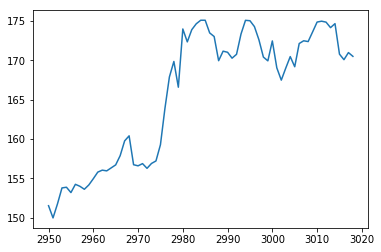

1.8515674880030053
0.2791176470588238


In [51]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.show()
dataList = data.tolist()

#determines the daily changes in percent, helps establish the random change generator
dataChange = []
for x in range(len(dataList) -1):
    dataChange.append(dataList[x+1] - dataList[x])

#Converts to numpy array for RNG calculations
dataNP = np.asarray(dataChange)
dataSTD = dataNP.std()
dataMean = dataNP.mean()
print(dataSTD)
print(dataMean)


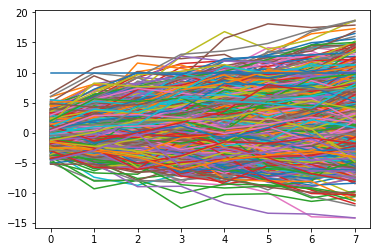

In [58]:
#Forecast the % change in the stock over a certain interval
def foreCast(days, mean, std):
    changeArray = []
    changeVal = 0
    for x in range(days):
        changeVal += np.random.normal(mean, std, 1)[0]
        changeArray.append(changeVal)
    
    return changeArray

#Number of simulations & the number of days forecasted per simulation
def monteSimulation(mean, std, simCount, perSimCount):
    masterArray = []
    for x in range(simCount):
        masterArray.append(foreCast(perSimCount, mean, std))
    return masterArray

mainForecast = []
#Number of forecasts
foreCastCount = 1000
#Number of days into the future
dayCount = 8

#option Val is the % difference between the current price
optionVal = 10
optionArray = []
for x in range(dayCount):
    optionArray.append(optionVal)

monteResult = monteSimulation(dataMean, dataSTD, foreCastCount, dayCount)

for x in range(len(monteResult)):
    plt.plot(monteResult[x])
    
plt.plot(optionArray)

plt.show()


In [59]:
#Determines the number of MC simulations that are above the option price
aboveCount = 0
for x in range(len(monteResult)):
    if(optionVal < monteResult[x][-1]):
        aboveCount += 1

abovePercent = aboveCount / foreCastCount
print("There is a " + str(abovePercent) + " chance that the value exceeds the option in " + str(dayCount) + " days")

There is a 0.088 chance that the value exceeds the option in 8 days


170.52
Max profit range:
[-2.941176470588235, 2.941176470588235]
Break even range:
[-4.411764705882352, 4.411764705882352]


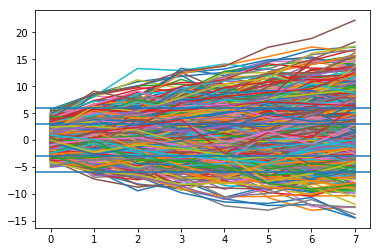

Odds that it stays within max range: 
0.365
Odds that it stays within break-even range: 
0.534


In [60]:
#pricing an iron condor
assetPrice = dataList[-1]
print(assetPrice)
#value is the percent that it is +- compared to the base
#so 175 option val is (175-170)/170
boughtPUT = (160-170)/170 * 100
soldPUT = (165-170)/170 * 100
soldCall = (175-170)/170 * 100
boughtCall = (180-170)/170 * 100

#Range where profit is maximized
print("Max profit range:")
maxProfitRange = [soldPUT, soldCall]
print(maxProfitRange)

#Range where end result is break even
print("Break even range:")
breakEvenRange = [(soldPUT + boughtPUT)/2, (soldCall + boughtCall)/2]
print(breakEvenRange)

simulationCount = 1000
#Number of days until the option expires
OPTEXP = 8

monteResult = monteSimulation(dataMean, dataSTD, simulationCount, OPTEXP)

for x in range(len(monteResult)):
    plt.plot(monteResult[x])
    
plt.axhline(boughtPUT)
plt.axhline(soldPUT)
plt.axhline(soldCall)
plt.axhline(boughtCall)

plt.show()

probMax = 0
probBreakEven = 0
for x in range(len(monteResult)):
    finalVal = monteResult[x][-1]
    if(finalVal > maxProfitRange[0] and finalVal < maxProfitRange[1]):
        probMax += 1
    if(finalVal > breakEvenRange[0] and finalVal < breakEvenRange[1]):
        probBreakEven += 1

probMax = probMax / simulationCount
probBreakEven = probBreakEven / simulationCount
print("Odds that it stays within max range: ")
print(probMax)
print("Odds that it stays within break-even range: ")
print(probBreakEven)

Butterfly spread profit range: 
[-1.4705882352941175, 1.4705882352941175]


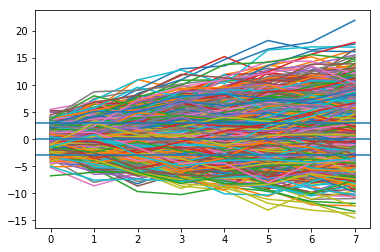

Break Even odds: 
19.7%


In [62]:
#pricing a butterfly spread
#value is the percent that it is +- compared to the base
#so 175 option val is (175-170)/170
buyLowCall = (165 - 170)/170 * 100
sellAtCall = (170 - 170)/170 * 100
buyHighCall = (175 - 170)/170 * 100

profitRange = [(buyLowCall + sellAtCall)/2, (buyHighCall + sellAtCall)/2]
print("Butterfly spread profit range: ")
print(profitRange)

simulationCount = 1000
#Number of days until the option expires
OPTEXP = 8

monteResult = monteSimulation(dataMean, dataSTD, simulationCount, OPTEXP)

for x in range(len(monteResult)):
    plt.plot(monteResult[x])
    
plt.axhline(buyLowCall)
plt.axhline(sellAtCall)
plt.axhline(buyHighCall)

plt.show()

breakEvenCount = 0
for x in range(len(monteResult)):
    lastVal = monteResult[x][-1]
    if(lastVal > profitRange[0] and lastVal < profitRange[1]):
        breakEvenCount += 1
        
breakEvenOdds = breakEvenCount / simulationCount * 100
print("Break Even odds: ")
print(str(breakEvenOdds) + "%")